<a href="https://colab.research.google.com/github/Prezii/Project/blob/main/download_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import obspy and packages

In [1]:
import sys
!{sys.executable} -m pip install obspy
import obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

###Download google drive packages

In [4]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
downloaded = drive.CreateFile({'id':"1jj-HatdkFPAXpqk27z_SLmJHqtl_VhgI"})   # replace the id with id of file you want to access
downloaded.GetContentFile('date_dataset.csv')        # replace the file name with your file

In [6]:
data = pd.read_csv('date_dataset.csv')
#df.reindex(columns=['Available_Since_Date','Product_name', 'Unit_Price','No_Of_Units','Available_Quantity'])
data.head()

,Unnamed: 0,0
0,0,2015-07-14T02:27:30
1,1,2010-02-06T21:07:30
2,2,2011-06-03T16:22:30
3,3,2011-06-08T11:15:00
4,4,2011-08-25T07:00:00


In [7]:
date_dataset = data.to_numpy()[:,1]
print(len(date_dataset))

293788


##Obspy station example

In [8]:
client = Client("IRIS")
network = "CN" #Canadian National Seismograph Network
station = "PGC"
location="*"
channel= "*"

In [9]:
starttime= UTCDateTime(2015, 7, 14, 22, 24, 57) 
endtime = starttime + 300 # 5 min = 300 sec

In [10]:
inv = client.get_stations(network=network, station=station, channel=channel,starttime=starttime,endtime=endtime,level="response")
print(inv)

Inventory created at 2022-08-31T16:54:25.273600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.49
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2015-07-14...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CN
		Stations (1):
			CN.PGC (Sidney, BC, CA)
		Channels (3):
			CN.PGC..BHZ, CN.PGC..BHN, CN.PGC..BHE


##Creating inventory

In [11]:
def createInventory(stream,starttime,endtime):
    '''
    This function generates an inventory with the info from all the stations.
    stream=contains all the traces in a stream using the obspy function Stream()
    starttime=starttime of the trace record.
    endtime=endtime of the trace record.
    '''
    ###Get the information for all the stations.
    first=True
    for tr in stream:
        if (first==True):
            inv = client.get_stations(network=tr.stats.network, station=tr.stats.station, 
                                      location='*', channel='BHE',starttime=starttime,
                                      endtime=endtime, level="response")
            first=False
        else:
            inv += client.get_stations(network=tr.stats.network, station=tr.stats.station, 
                                       location='*', channel='BHE',starttime=starttime,
                                       endtime=endtime, level="response")

    return (inv)

In [12]:
#Ir añadiendo archivos al Stream

##Download data



```
def placeObservedTraces(directory,projectName,stream):
    '''
    Function that generates the sac files and place them in the right folder.
    directory=current working space.
    projectName=one of the following: NearField/FarField/JointInversion.
    '''
    for tr in stream:
        if tr.stats.channel=='BHN' or tr.stats.channel=='HHN':
            comp='n'
        if tr.stats.channel=='BHE' or tr.stats.channel=='HHE':
            comp='e'
        if tr.stats.channel=='BHZ' or tr.stats.channel=='HHZ':
            comp='u'
        tr.write(str(directory)+str(projectName)+'/data/waveforms/'+str(tr.stats.station)+'.disp.'+comp, format='SAC')
    #!nautilus {directory}{projectName}/data/waveforms/
    !open {directory}{projectName}/data/waveforms/
```



In [13]:
def placeObservedTraces(directory,projectName,stream):
    '''
    Function that generates the sac files and place them in the right folder.
    directory=current working space.
    projectName=one of the following: NearField/FarField/JointInversion.
    '''
    for tr in stream:
        if tr.stats.channel=='BHN' or tr.stats.channel=='HHN':
            comp='n'
        if tr.stats.channel=='BHE' or tr.stats.channel=='HHE':
            comp='e'
        if tr.stats.channel=='BHZ' or tr.stats.channel=='HHZ':
            comp='u'
        tr.write(str(directory)+str(projectName)+'/data/waveforms/'+str(tr.stats.station)+'.disp.'+comp, format='SAC')
    #!nautilus {directory}{projectName}/data/waveforms/
    !open {directory}{projectName}/data/waveforms/

###Ejemplo de descarga

In [14]:
client = Client("IRIS")
network = "CN" #Canadian National Seismograph Network
station = "PGC"
location="*"
channel= "BHE"

In [15]:
starttime= UTCDateTime(2015, 7, 14, 22, 24, 57) 
endtime = starttime + 300 # 5 min = 300 sec

In [16]:
st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime)
print(st) 

1 Trace(s) in Stream:
CN.PGC..BHE | 2015-07-14T22:24:57.000000Z - 2015-07-14T22:29:57.000000Z | 40.0 Hz, 12001 samples


In [17]:
tr = st[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  import sys


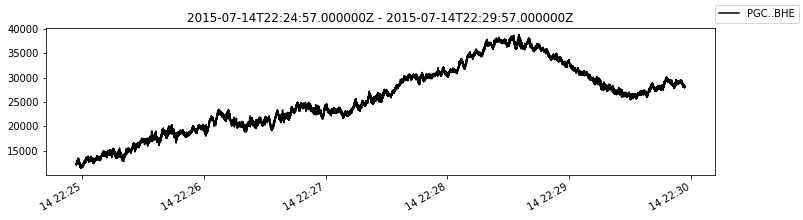

In [18]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(tr.times("matplotlib"), tr.data, color="0", label = f"{tr.stats.station}..{tr.stats.channel}")
ax.xaxis_date()
fig.autofmt_xdate()

fig.legend(loc="best")
plt.title(f"{tr.stats.starttime} - {tr.stats.endtime}")
plt.show()

In [19]:
tr.stats.station

'PGC'

In [20]:
tr.write("example.sac", format="SAC")  

In [21]:
tr.stats.station

'PGC'

###Subir a drive

In [22]:
#cd data/
#!mv file folder
#/content/drive/MyDrive/data

#CM.PRA.HHN.2019.358.19146.SAC

In [23]:
def download_sac_data(stream, starttime,  foldername, position = True):
  starttime = UTCDateTime(starttime)
  endtime = starttime + 300 # 5 min = 300 sec

  for tr in stream:
    if position == True:
      %cd foldername/
      position == False
      trace = tr.write(str(directory)+str(projectName)+'/data/waveforms/'+str(tr.stats.station)+'.disp.'+comp, format='SAC')
      !mv trace foldername
    else:
      trace = tr.write(str(directory)+str(projectName)+'/data/waveforms/'+str(tr.stats.station)+'.disp.'+comp, format='SAC')
      !mv trace foldername

In [27]:
#
import os

In [28]:
cmd = "ls"
os.system(cmd)
#subprocess.run(cmd)

0

In [33]:


cmd = !pwd

print(cmd)

['/content']


In [30]:
print(returned_value)

0
